In [84]:
import pandas as pd
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.dummy import DummyClassifier
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [4]:
df = pd.read_csv('../Data/heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
X = df.drop(columns='DEATH_EVENT')
y = df['DEATH_EVENT']

In [8]:
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.3,random_state=20)

In [9]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(209, 12)
(90, 12)
(209,)
(90,)


# Dummy Classifier

In [10]:
dc = DummyClassifier()

In [17]:
pipe_1 = Pipeline([('scaler', StandardScaler()), ('dummy_regr', DummyClassifier())])

pipe_1.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('dummy_regr', DummyClassifier())])

In [18]:
pipe_1.score(X_train,y_train)

0.6746411483253588

In [19]:
pipe_1.score(X_test,y_test)

0.6888888888888889

In [20]:
predictions_dc = pipe_1.predict(X_test)

              precision    recall  f1-score   support

           0       0.69      1.00      0.82        62
           1       0.00      0.00      0.00        28

    accuracy                           0.69        90
   macro avg       0.34      0.50      0.41        90
weighted avg       0.47      0.69      0.56        90



C:\Users\Sparrow\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sparrow\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sparrow\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sparrow\anaconda3\lib\site-packages\sklearn\metrics\_classifi

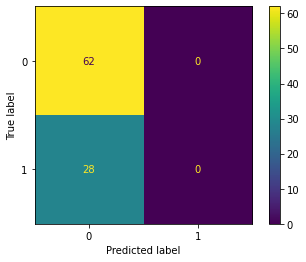

In [42]:
cm = confusion_matrix(y_test, predictions_dc, labels=dc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
                              
disp.plot();
Accuracy = metrics.accuracy_score(y_test, predictions_dc)
Precision = metrics.precision_score(y_test, predictions_dc)
Sensitivity_recall = metrics.recall_score(y_test, predictions_dc)
Specificity = metrics.recall_score(y_test, predictions_dc)
F1_score = metrics.f1_score(y_test, predictions_dc)
print(classification_report(y_test,predictions_dc))
plt.savefig('DummyClassifier')

# Logistic Regression

In [29]:
logreg = LogisticRegression()

In [31]:
pipe_2 = Pipeline([('scaler', StandardScaler()), ('logreg', LogisticRegression())])

pipe_2.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('logreg', LogisticRegression())])

In [32]:
pipe_2.score(X_train,y_train)

0.861244019138756

In [33]:
pipe_2.score(X_test,y_test)

0.7888888888888889

In [34]:
predictions_logreg = pipe_2.predict(X_test)

              precision    recall  f1-score   support

           0       0.83      0.87      0.85        62
           1       0.68      0.61      0.64        28

    accuracy                           0.79        90
   macro avg       0.76      0.74      0.75        90
weighted avg       0.78      0.79      0.79        90



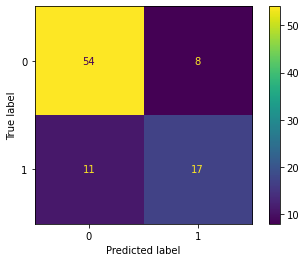

In [43]:
cm = confusion_matrix(y_test, predictions_logreg) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
                              
disp.plot();
Accuracy = metrics.accuracy_score(y_test, predictions_logreg)
Precision = metrics.precision_score(y_test, predictions_logreg)
Sensitivity_recall = metrics.recall_score(y_test, predictions_logreg)
Specificity = metrics.recall_score(y_test, predictions_logreg)
F1_score = metrics.f1_score(y_test, predictions_logreg)
print(classification_report(y_test,predictions_logreg))
plt.savefig('LogReg')

# Naive Bayes

In [45]:
nb = GaussianNB()

In [46]:
pipe_3 = Pipeline([('scaler', StandardScaler()), ('nb', GaussianNB())])

pipe_3.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('nb', GaussianNB())])

In [47]:
pipe_3.score(X_train,y_train)

0.7942583732057417

In [48]:
pipe_3.score(X_test,y_test)

0.7444444444444445

In [49]:
predictions_nb = pipe_3.predict(X_test)

              precision    recall  f1-score   support

           0       0.80      0.84      0.82        62
           1       0.60      0.54      0.57        28

    accuracy                           0.74        90
   macro avg       0.70      0.69      0.69        90
weighted avg       0.74      0.74      0.74        90



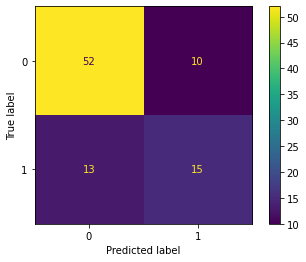

In [50]:
cm = confusion_matrix(y_test, predictions_nb) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
                              
disp.plot();
Accuracy = metrics.accuracy_score(y_test, predictions_nb)
Precision = metrics.precision_score(y_test, predictions_nb)
Sensitivity_recall = metrics.recall_score(y_test, predictions_nb)
Specificity = metrics.recall_score(y_test, predictions_nb)
F1_score = metrics.f1_score(y_test, predictions_nb)
print(classification_report(y_test,predictions_nb))
plt.savefig('nb')

# Stochastic Gradient Descent

In [52]:
sgd = SGDClassifier()

In [53]:
pipe_4 = Pipeline([('scaler', StandardScaler()), ('sgd', SGDClassifier())])

pipe_4.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('sgd', SGDClassifier())])

In [54]:
pipe_4.score(X_train,y_train)

0.8229665071770335

In [55]:
pipe_4.score(X_test,y_test)

0.7444444444444445

In [57]:
predictions_sgd = pipe_4.predict(X_test)

              precision    recall  f1-score   support

           0       0.81      0.82      0.82        62
           1       0.59      0.57      0.58        28

    accuracy                           0.74        90
   macro avg       0.70      0.70      0.70        90
weighted avg       0.74      0.74      0.74        90



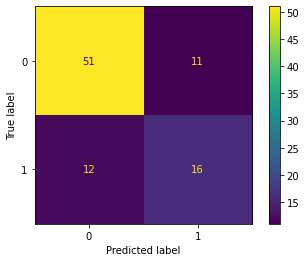

In [58]:
cm = confusion_matrix(y_test, predictions_sgd) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
                              
disp.plot();
Accuracy = metrics.accuracy_score(y_test, predictions_sgd)
Precision = metrics.precision_score(y_test, predictions_sgd)
Sensitivity_recall = metrics.recall_score(y_test, predictions_sgd)
Specificity = metrics.recall_score(y_test, predictions_sgd)
F1_score = metrics.f1_score(y_test, predictions_sgd)
print(classification_report(y_test,predictions_sgd))
plt.savefig('sgd')

# KNN

In [61]:
KNN = KNeighborsClassifier()

In [63]:
pipe_5 = Pipeline([('scaler', StandardScaler()), ('KNN', KNeighborsClassifier())])

pipe_5.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('KNN', KNeighborsClassifier())])

In [64]:
pipe_5.score(X_train,y_train)

0.7942583732057417

In [65]:
pipe_5.score(X_test,y_test)

0.6555555555555556

In [73]:
predictions_KNN = pipe_5.predict(X_test)

              precision    recall  f1-score   support

           0       0.71      0.85      0.77        62
           1       0.40      0.21      0.28        28

    accuracy                           0.66        90
   macro avg       0.55      0.53      0.53        90
weighted avg       0.61      0.66      0.62        90



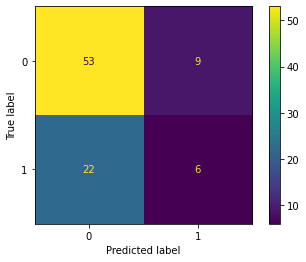

In [74]:
cm = confusion_matrix(y_test, predictions_KNN) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
                              
disp.plot();
Accuracy = metrics.accuracy_score(y_test, predictions_KNN)
Precision = metrics.precision_score(y_test, predictions_KNN)
Sensitivity_recall = metrics.recall_score(y_test, predictions_KNN)
Specificity = metrics.recall_score(y_test, predictions_KNN)
F1_score = metrics.f1_score(y_test, predictions_KNN)
print(classification_report(y_test,predictions_KNN))
plt.savefig('KNN')

# Decision Tree

In [69]:
dtree = DecisionTreeClassifier(max_depth=10, random_state=20)

In [70]:
pipe_6 = Pipeline([('scaler', StandardScaler()), ('dtree', DecisionTreeClassifier(max_depth=10,random_state=20))])

pipe_6.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('dtree',
                 DecisionTreeClassifier(max_depth=10, random_state=20))])

In [71]:
pipe_6.score(X_train,y_train)

1.0

In [72]:
pipe_6.score(X_test,y_test)

0.7777777777777778

In [75]:
predictions_dtree = pipe_6.predict(X_test)

              precision    recall  f1-score   support

           0       0.82      0.87      0.84        62
           1       0.67      0.57      0.62        28

    accuracy                           0.78        90
   macro avg       0.74      0.72      0.73        90
weighted avg       0.77      0.78      0.77        90



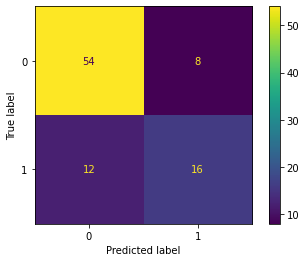

In [76]:
cm = confusion_matrix(y_test, predictions_dtree) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
                              
disp.plot();
Accuracy = metrics.accuracy_score(y_test, predictions_dtree)
Precision = metrics.precision_score(y_test, predictions_dtree)
Sensitivity_recall = metrics.recall_score(y_test, predictions_dtree)
Specificity = metrics.recall_score(y_test, predictions_dtree)
F1_score = metrics.f1_score(y_test, predictions_dtree)
print(classification_report(y_test,predictions_dtree))
plt.savefig('dtree')

# Random Forest

In [78]:
rfm = RandomForestClassifier(n_jobs =-1, random_state=20)

In [79]:
pipe_7 = Pipeline([('scaler', StandardScaler()), ('rfm',RandomForestClassifier(n_jobs =-1, random_state=20))])

pipe_7.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('rfm', RandomForestClassifier(n_jobs=-1, random_state=20))])

In [80]:
pipe_7.score(X_train,y_train)

1.0

In [81]:
pipe_7.score(X_test,y_test)

0.7777777777777778

In [82]:
predictions_rfm = pipe_7.predict(X_test)

              precision    recall  f1-score   support

           0       0.83      0.85      0.84        62
           1       0.65      0.61      0.63        28

    accuracy                           0.78        90
   macro avg       0.74      0.73      0.74        90
weighted avg       0.77      0.78      0.78        90



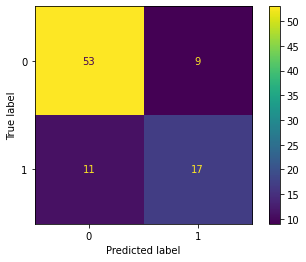

In [83]:
cm = confusion_matrix(y_test, predictions_rfm) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
                              
disp.plot();
Accuracy = metrics.accuracy_score(y_test, predictions_rfm)
Precision = metrics.precision_score(y_test, predictions_rfm)
Sensitivity_recall = metrics.recall_score(y_test, predictions_rfm)
Specificity = metrics.recall_score(y_test, predictions_rfm)
F1_score = metrics.f1_score(y_test, predictions_rfm)
print(classification_report(y_test,predictions_rfm))
plt.savefig('rfm')

# SVM

In [85]:
svm = SVC(random_state=20)

In [86]:
pipe_8 = Pipeline([('scaler', StandardScaler()), ('svm',SVC(random_state=20))])

pipe_8.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svm', SVC(random_state=20))])

In [87]:
pipe_8.score(X_train,y_train)

0.9138755980861244

In [88]:
pipe_8.score(X_test,y_test)

0.7

In [89]:
predictions_svm = pipe_8.predict(X_test)

              precision    recall  f1-score   support

           0       0.77      0.81      0.79        62
           1       0.52      0.46      0.49        28

    accuracy                           0.70        90
   macro avg       0.64      0.64      0.64        90
weighted avg       0.69      0.70      0.70        90



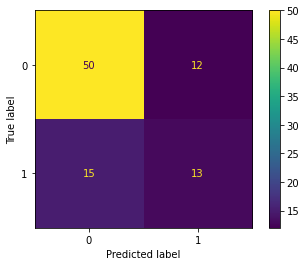

In [90]:
cm = confusion_matrix(y_test, predictions_svm) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
                              
disp.plot();
Accuracy = metrics.accuracy_score(y_test, predictions_svm)
Precision = metrics.precision_score(y_test, predictions_svm)
Sensitivity_recall = metrics.recall_score(y_test, predictions_svm)
Specificity = metrics.recall_score(y_test, predictions_svm)
F1_score = metrics.f1_score(y_test, predictions_svm)
print(classification_report(y_test,predictions_svm))
plt.savefig('svm')